# Prevendo Churn de clientes

In [ ]:
# Importação de Bibliotecas
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

# Módulos sklearn para avaliação e melhoria de modelos
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score

In [ ]:
# Leitura do conjunto de dados
from google.colab import files
uploaded = files.upload()

Saving churn-80.csv to churn-80.csv


In [ ]:
# Carregar o conjunto de dados em um data frame
df = pd.read_csv('churn-80.csv')
df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Visualizando numeros de colunas e linhas
df.shape

(2666, 20)

In [ ]:
# Visualizando todas as colunas
df.columns.values

array(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'], dtype=object)

In [ ]:
# Verificação de dados do dataset, se possui valores nulos e ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
# Valores únicos (por coluna)
df.nunique()

State                       51
Account length             205
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       42
Total day minutes         1489
Total day calls            115
Total day charge          1489
Total eve minutes         1442
Total eve calls            120
Total eve charge          1301
Total night minutes       1444
Total night calls          118
Total night charge         885
Total intl minutes         158
Total intl calls            21
Total intl charge          158
Customer service calls      10
Churn                        2
dtype: int64

In [ ]:
# Verificação estatística
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# Verificação de quantas pessoas estão saindo ou não
df['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

É observamos que 2278 clinetes não realizaram o churn já 388 sim

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


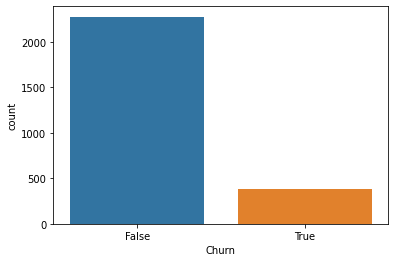

In [ ]:
# Visualizar a contagem de churn de clientes com o gráfico de barras
sns.countplot(df['Churn'])

In [ ]:
# Porcentagem de clientes que não sairam
clientes = df[df.Churn == False].shape[0]
naocliente = df[df.Churn == True].shape[0]

# Imprimindo a porcentagem de clientes que ficaram 
print(clientes / (clientes + naocliente) * 100, '% porcentagem de clientes que permaneceram na empresa')

# Imprimindo a porcentagem de clientes que não ficaram 
print(naocliente / (clientes + naocliente) * 100, '% porcentagem de clientes que não permaneceram na empresa')

85.4463615903976 % porcentagem de clientes que permaneceram na empresa
14.553638409602401 % porcentagem de clientes que não permaneceram na empresa


É observado que os dados é muito desiquilubrado

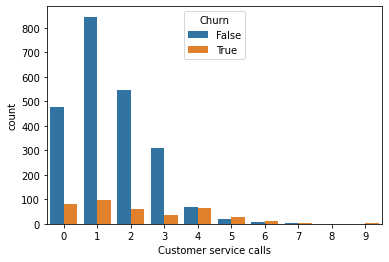

In [ ]:
# Visualizar chamadas de atendimento ao cliente e clientes que sairam e ficaram
sns.countplot(x = 'Customer service calls', hue = 'Churn', data = df)

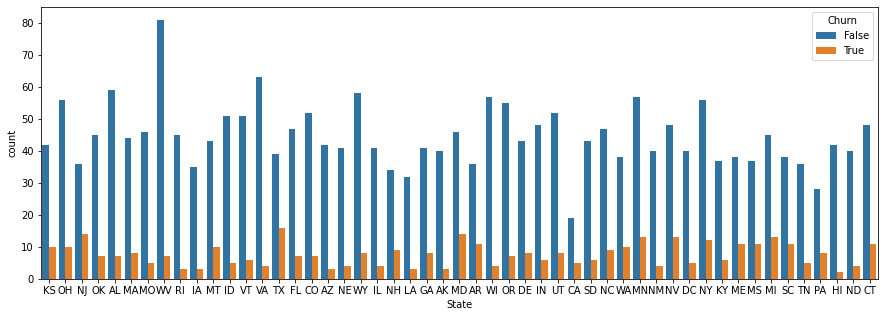

In [ ]:
# Vizualizar os estado e os Churn
fig = plt.figure(figsize=(15,5))
sns.countplot(x = 'State', hue = 'Churn', data = df)


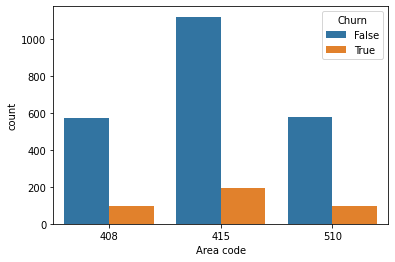

In [ ]:
sns.countplot(x = 'Area code', hue = 'Churn', data = df)

In [ ]:
df_limpo = df.drop(columns=['Area code'])
df_limpo

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


Pelo gráfico acho que não haja qualquer relação presente entre Area code e Churn
ao qual o cliente deixa o operadora

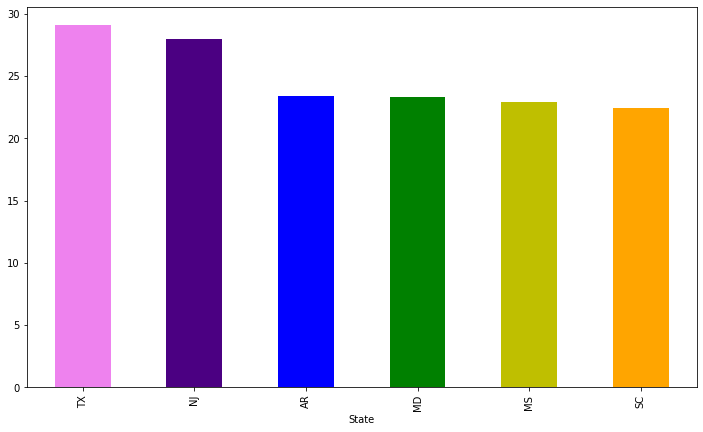

In [ ]:
# Estado com maior percentagem de churn
plt.rcParams['figure.figsize'] = (12,7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
(df_limpo.groupby(['State'])['Churn'].mean()*100).sort_values(ascending = False).head(6).plot.bar(color = ['violet', 'indigo', 'b', 'g', 'y', 'orange', 'r'])


In [ ]:
# Verificar planos internaionais
df_limpo['International plan'].value_counts()

No     2396
Yes     270
Name: International plan, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


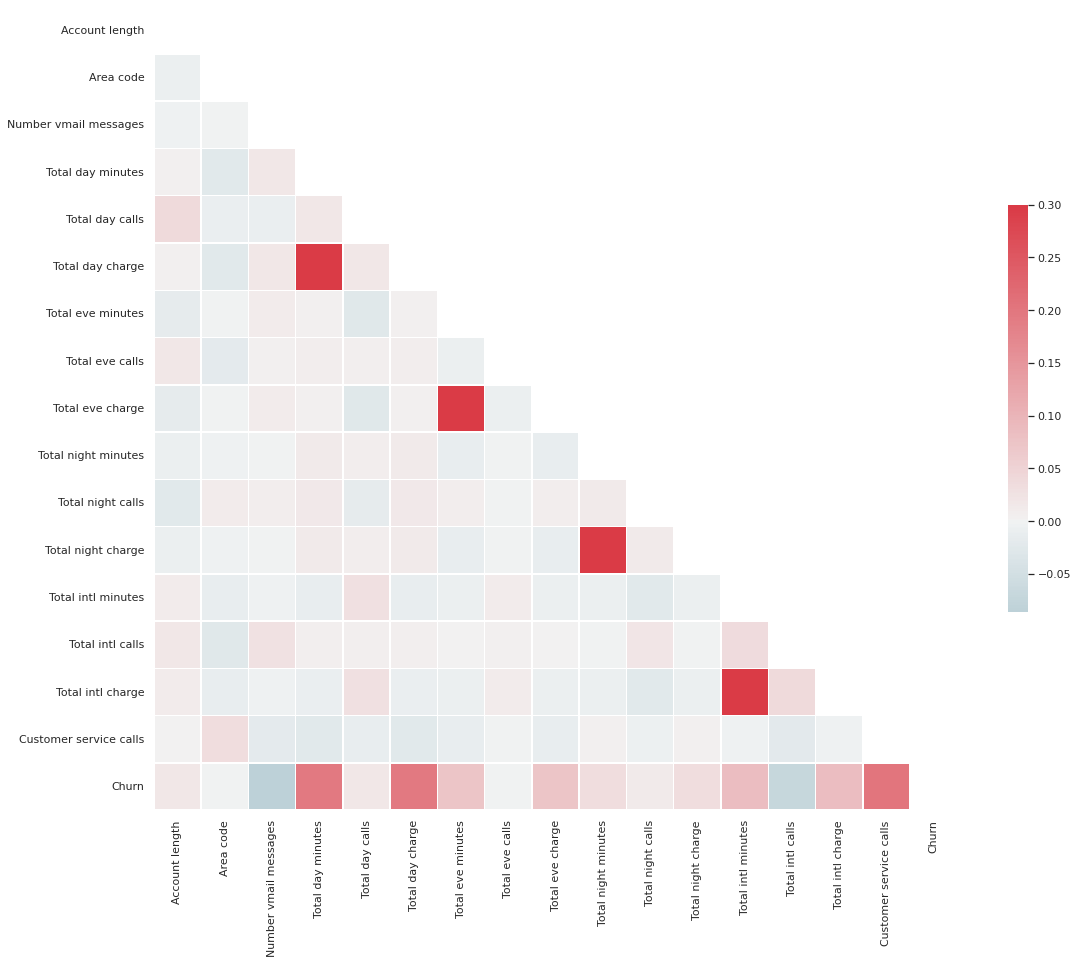

In [ ]:
# Matriz de correlação
sns.set(style="white")
corr = df.corr()

# Desativando a parte superior da matriz de correlação
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Configurção da figura matplotlib e do mapa de cores divergente
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Desenho do mapa de calor com a desativação da parte superior e a proporção correta:
sns.heatmap(corr, mask = mask, cmap=cmap, vmax=.3, center=0,
square = True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# Converter linha não numérica em numéricas
df_limpo['Churn'].replace(to_replace=[False, True], value=[0,1],inplace=True)
df_limpo['International plan'].replace(to_replace=['No', 'Yes'], value=[0,1],inplace=True)
df_limpo['Voice mail plan'].replace(to_replace=['No', 'Yes'], value=[0,1],inplace=True)

df_limpo.head()

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


Como visto no gráfico de correlação acima, pode-se obervar que existem 4 variáveis ​​('total day charge', 'total eve charge', 'total night charge', 'total intl charge') que são diretamente dependentes as variáveis ('total day call', 'total eve calls', 'total night calls', 'total intl calls')

In [ ]:
# Identificando a variável de resposta:   
y = df_limpo['Churn']
X = df_limpo.drop(columns=['Churn', 'State'])
X.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [ ]:
# Normalizando os dados
X = StandardScaler().fit(X).transform(X)
X_norm = pd.DataFrame(X)
X_norm.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.692163,-0.335690,1.623917,1.247508,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,-0.469031,0.856707,-0.085020,-0.597527,-0.085681,-0.429172
1,0.161278,-0.335690,1.623917,1.320985,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,0.149054,1.049293,1.242179,-0.597527,1.242921,-0.429172
2,0.919686,-0.335690,-0.615795,-0.589414,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,0.200561,-0.758391,0.704125,0.216894,0.698194,-1.191955
3,-0.420168,2.978938,-0.615795,-0.589414,2.212509,-1.466653,2.212675,-2.718509,-0.596479,-2.718922,-0.084083,-0.572045,-0.084339,-1.304609,1.031314,-1.307995,0.333610
4,-0.647691,2.978938,-0.615795,-0.589414,-0.235822,0.634985,-0.235772,-1.022461,1.090224,-1.021482,-0.281046,1.076181,-0.281303,-0.049150,-0.597527,-0.045823,1.096392


In [ ]:
# Gerarando os conjuntos de dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.25, random_state = 10)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state = 10)

Comparação de Algoritmos de Classificação de Linha de Base 1ª Iteração 

In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators= 15, max_features= 6, random_state= 7)))

# Avaliação dos resultados do modelo
acc_results = []
auc_results = []
names = []

# Definir tabela a tabela para preencher com resultados de desempenho
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0

# Avalie cada modelo usando validação cruzada k-fold:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=0)
  
  # Accuracy
    cv_acc_results = model_selection.cross_val_score(model, X_norm, y, cv=kfold, scoring='accuracy')

    # roc_auc scoring:
    acc_results.append(cv_acc_results)
    auc_results.append(cv_acc_results)
    names.append(name)
    model_results.loc[i] = [name,
                            round(cv_acc_results.mean()*100, 2),
                            round(cv_acc_results.std()*100, 2),
                            round(cv_acc_results.mean()*100, 2),
                            round(cv_acc_results.std()*100, 2)
                          ] 
    i += 1
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
6,Random Forest,95.54,1.05,95.54,1.05
2,Kernel SVM,91.41,1.21,91.41,1.21
5,Decision Tree Classifier,90.96,1.76,90.96,1.76
3,KNN,88.71,1.82,88.71,1.82
4,Gaussian NB,86.20,1.29,86.20,1.29
1,SVC,85.45,1.83,85.45,1.83
0,Logistic Regression,76.33,2.17,76.33,2.17


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


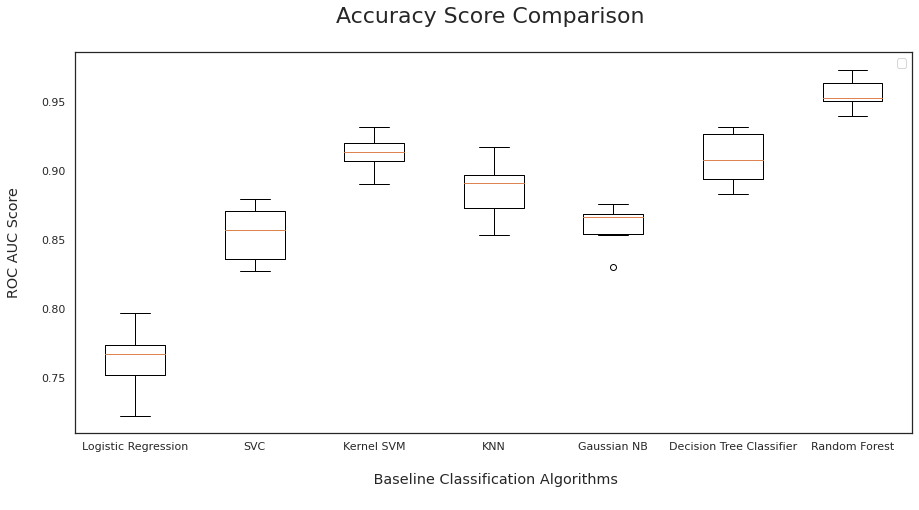

In [ ]:
# A métrica ROC (Receiver Operating Characteristic) para avaliar qualidade de saída dos classificadores.

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',horizontalalignment='center',fontstyle = 'normal', fontsize = 'large', fontfamily = 'sans-serif')

plt.xlabel('\n Baseline Classification Algorithms\n', horizontalalignment='center',fontstyle = 'normal', fontsize = 'large', fontfamily = 'sans-serif')
plt.title('Accuracy Score Comparison \n', horizontalalignment="center", fontstyle = "normal", 
fontsize = '22', fontfamily = 'sans-serif')

plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

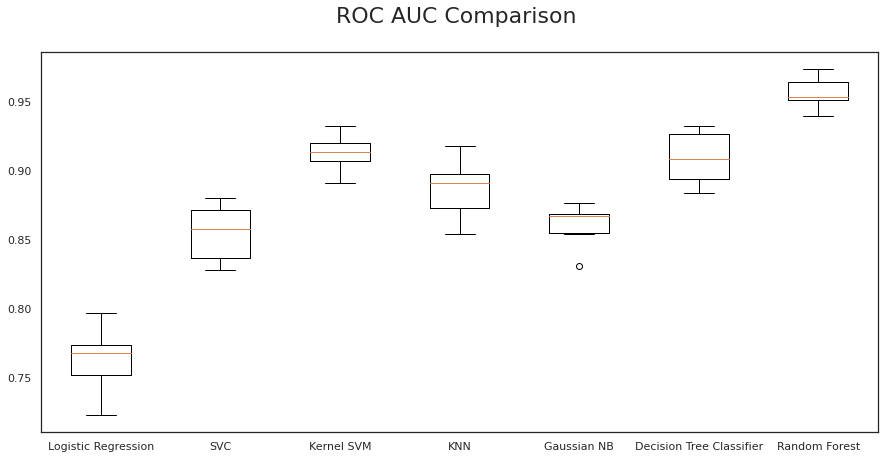

In [ ]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
#plt.ylabel('ROC AUC Score\n', horizontalalignment="center",fontstyle = "normal",fontsize = "large", fontfamily = "sans-serif")
#plt.xlabel('\n Baseline Classification Algorithms\n', horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('ROC AUC Comparison \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

É notório que a partir das métricas ROC os melhores modelos de algoritmos capaz de distinguir entre as classes 0 e 1 são Kernel SVM, seguindo do Decision Tree Classifier e em terceiro o KNN.

# Obtendo os parâmetros certos para os modelos de linha de base

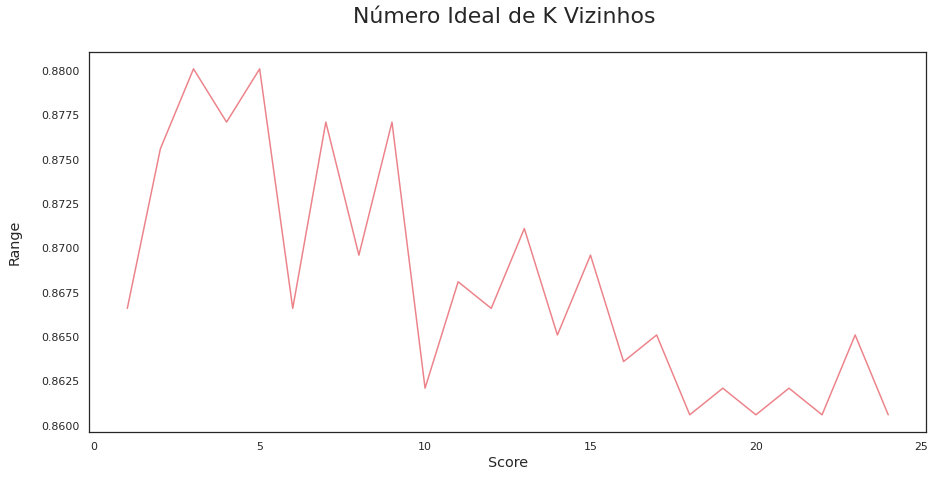

'Na primeira iteração, foi assumido K = 3, mas, na realidade, não sabemos qual é o valor K ideal que dá a máxima precisão para o conjunto de dados de treinamento escolhido. Portanto, foi escrito um loop for que itera de 20 a 30 vezes e fornece a precisão em cada iteração, de modo a descobrir o número ideal de vizinhos K para o Modelo KNN.'

In [ ]:
# Identifique o número ideal de vizinhos K para o Modelo KNN:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
#set K neighbor as 3
    knn_loop.fit(X_train,y_train)
    score_array.append(knn_loop.score(X_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif") 
plt.title('Número Ideal de K Vizinhos \n',
horizontalalignment="center", fontstyle = "normal",
 fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

"""Na primeira iteração, foi assumido K = 3, mas, na realidade, não sabemos qual é o valor K ideal que dá a máxima precisão para o conjunto de dados de treinamento escolhido. Portanto, foi escrito um loop for que itera de 20 a 30 vezes e fornece a precisão em cada iteração, de modo a descobrir o número ideal de vizinhos K para o Modelo KNN."""

Como podemos ver nas iterações acima, se usarmos K = 5, obteremos a pontuação um pouco maior de 0,88%.

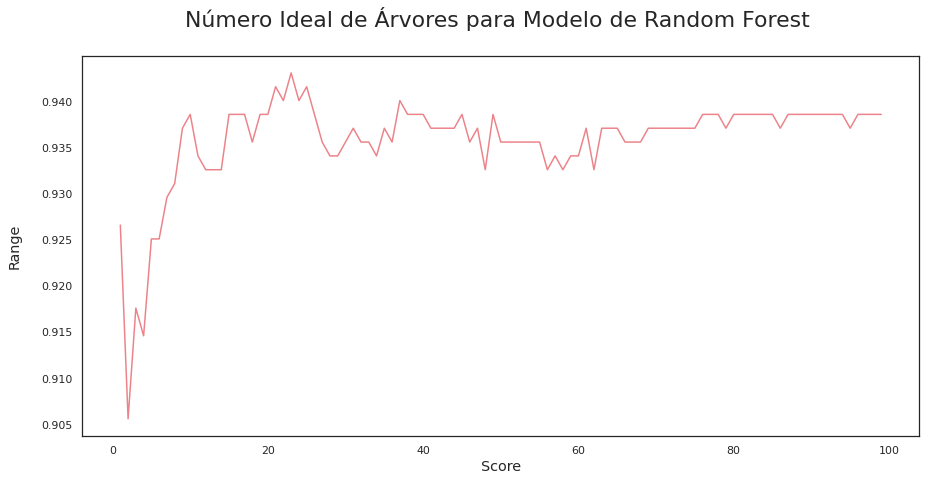

In [ ]:
# Identifique o número ideal de árvores para o Modelo de Random Forest
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(
n_estimators = each, random_state = 1) 
    rf_loop.fit(X_train,y_train)
    score_array.append(rf_loop.score(X_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Número Ideal de Árvores para Modelo de Random Forest \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

O número ideal de árvores de decisão para compor a melhor floresta aleatória, conforme se pode observar no gráfico acima é qunado atingi a maior pontuação de precisão do n_estimators = 23.

# Comparação de algoritmos de classificação de linha de base (2ª iteração):

In [ ]:
# Regressão Logística

# Ajustando a regressão logística ao conjunto de treinamento
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Prevendo os resultados do conjunto de teste
y_pred = classifier.predict(X_test)

# Avaliando os resultados
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2.0)
results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1, f2]], columns = ['Model', 
'Accuracy', 'Precision', 'Recall', 'F1 Score', 
'F2 Score'])
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.845577        0.5  0.213592   0.29932  0.241228


In [ ]:
# Máquina vetorial de suporte (classificador linear)

# Ajustando SVM (classe SVC) ao conjunto de treinamento
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Prevendo os resultados do conjunto de testes 
y_pred = classifier.predict(X_test)



# Avaliando os resultado
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame(
[['SVM (Linear)', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.845577        0.5  0.213592   0.29932  0.241228
1         SVM (Linear)  0.845577        0.0  0.000000   0.00000  0.000000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# K-Vizinhos mais próximos

# Ajustando o KNN ao conjunto de treinamento:
classifier = KNeighborsClassifier(
n_neighbors = 5, 
metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred  = classifier.predict(X_test)

# Avaliando os resultado
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['K-Nearest Neighbours', 
acc, prec, rec, f1, f2]], columns = ['Model',
 'Accuracy', 'Precision', 'Recall',
 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
2  K-Nearest Neighbours  0.880060   0.810811  0.291262  0.428571  0.334076
0   Logistic Regression  0.845577   0.500000  0.213592  0.299320  0.241228
1          SVM (Linear)  0.845577   0.000000  0.000000  0.000000  0.000000


In [ ]:
# SVM do kernel

# Ajustando Kernel SVM ao conjunto de treinamento:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Prevendo os resultados do conjunto de teste 
y_pred = classifier.predict(X_test)

# Avaliando os resultado
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Kernel SVM', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
3            Kernel SVM  0.901049   0.877551  0.417476  0.565789  0.466377
0  K-Nearest Neighbours  0.880060   0.810811  0.291262  0.428571  0.334076
1   Logistic Regression  0.845577   0.500000  0.213592  0.299320  0.241228
2          SVM (Linear)  0.845577   0.000000  0.000000  0.000000  0.000000


In [ ]:
# Byes ingênuos

# Ajustando Naive Byes ao conjunto de treinamento:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Prevendo os resultados do conjunto de teste
y_pred = classifier.predict(X_test)

# Avaliando os resultado
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Naive Byes', acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision',
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0            Kernel SVM  0.901049   0.877551  0.417476  0.565789  0.466377
1  K-Nearest Neighbours  0.880060   0.810811  0.291262  0.428571  0.334076
4            Naive Byes  0.853073   0.524752  0.514563  0.519608  0.516569
2   Logistic Regression  0.845577   0.500000  0.213592  0.299320  0.241228
3          SVM (Linear)  0.845577   0.000000  0.000000  0.000000  0.000000


In [ ]:
# Árvore de decisão

# Ajustando a árvore de decisão ao conjunto de treinamento:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Prevendo os resultados do conjunto de teste
y_pred = classifier.predict(X_test)

# Avaliando os resultado
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([[
'Decision Tree', acc, prec, rec, f1, f2]],
 columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0            Kernel SVM  0.901049   0.877551  0.417476  0.565789  0.466377
1  K-Nearest Neighbours  0.880060   0.810811  0.291262  0.428571  0.334076
5         Decision Tree  0.919040   0.769231  0.679612  0.721649  0.695825
2            Naive Byes  0.853073   0.524752  0.514563  0.519608  0.516569
3   Logistic Regression  0.845577   0.500000  0.213592  0.299320  0.241228
4          SVM (Linear)  0.845577   0.000000  0.000000  0.000000  0.000000


In [ ]:
# Floresta aleatória

# Ajustando Random Forest ao treinamento:
classifier = RandomForestClassifier(n_estimators = 23, 
criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Prevendo os resultados do conjunto de teste
y_pred = classifier.predict(X_test)

# Avaliando os resultado
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)
model_results = pd.DataFrame([['Random Forest', 
acc, prec, rec, f1, f2]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score', 'F2 Score'])
results = results.append(model_results, ignore_index = True)
results = results.sort_values(["Precision", 
"Recall", "F2 Score"], ascending = False)
print (results)

                  Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0         Random Forest  0.929535   0.937500  0.582524  0.718563  0.630252
7         Random Forest  0.929535   0.937500  0.582524  0.718563  0.630252
1            Kernel SVM  0.901049   0.877551  0.417476  0.565789  0.466377
2  K-Nearest Neighbours  0.880060   0.810811  0.291262  0.428571  0.334076
3         Decision Tree  0.919040   0.769231  0.679612  0.721649  0.695825
4            Naive Byes  0.853073   0.524752  0.514563  0.519608  0.516569
5   Logistic Regression  0.845577   0.500000  0.213592  0.299320  0.241228
6          SVM (Linear)  0.845577   0.000000  0.000000  0.000000  0.000000


Nessa 2ª iteração, observando e comparando com a primeria iteração, notamos que mais uma vez o modelo de algoritmo que implica o melhor é o Random Forest para o conjunto de dados dado, pois possui relativamente a maior combinação de pontuação, recordação e F2;

# Avaliação do Modelo Random Forest

In [ ]:
seed = 7
num_trees = 15
max_features = 6

#divisao dos dados
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.30, random_state=seed)

#numero de folds atraves do metodo k-fold
kfold = model_selection.StratifiedKFold(n_splits=10)

#criando o classificador Random Forest
model_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=seed)

#treinamento do Random Forest em dez folds
results = model_selection.cross_val_score(model_rf, X_train, y_train, cv=10)

model_rf = model_rf.fit(X_train,y_train)

print("Random Forest folds:", results, "\nMedia treinamento: " ,results.mean())
print("Treinamento: ", model_rf.score(X_train,y_train))
print("Teste: ", model_rf.score(X_test,y_test))

Random Forest folds: [0.93582888 0.95721925 0.94652406 0.95187166 0.96256684 0.93048128
 0.91935484 0.94086022 0.93548387 0.93548387] 
Media treinamento:  0.9415674774308551
Treinamento:  0.9946409431939979
Teste:  0.95125


Portanto, nossos resultados de Validação Cruzada k-fold indicam que teríamos uma média de previsão no treinamento de 94 %.

A partir desse conjunto de dados de rotatividade de clientes para criar um classificador de aprendizado de máquina que prevê a propensão de qualquer cliente a desistir nos próximos meses com uma pontuação de precisão razoável de 94%